In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas
import sklearn
import statsmodels

print(pandas.__version__)
print(sklearn.__version__)
print(statsmodels.__version__)

1.3.5
1.2.1
0.13.5


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# 시계열 데이터 준비

In [4]:
os.environ['HOME']=''
print(os.getenv('HOME'))

In [5]:
dataset_filepath=os.getenv('HOME')+'/content/drive/MyDrive/Exploration/Exploration_4/data/AAPL.csv'
df=pd.read_csv(dataset_filepath)
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-09-20,143.800003,144.839996,141.270004,142.940002,142.143494,123478900
1,2021-09-21,143.929993,144.600006,142.779999,143.429993,142.630753,75834000
2,2021-09-22,144.449997,146.429993,143.699997,145.850006,145.037277,76404300
3,2021-09-23,146.649994,147.080002,145.639999,146.830002,146.011826,64838200
4,2021-09-24,145.660004,147.470001,145.559998,146.919998,146.101303,53477900


In [6]:
df=pd.read_csv(dataset_filepath, index_col='Date',parse_dates=True)

ts = df['Close']
print(type(ts))
ts.head()

<class 'pandas.core.series.Series'>


Date
2021-09-20    142.940002
2021-09-21    143.429993
2021-09-22    145.850006
2021-09-23    146.830002
2021-09-24    146.919998
Name: Close, dtype: float64

# 각종 전처리 수행

In [7]:
ts=ts.interpolate(method='time')
ts[ts.isna()]

Series([], Name: Close, dtype: float64)

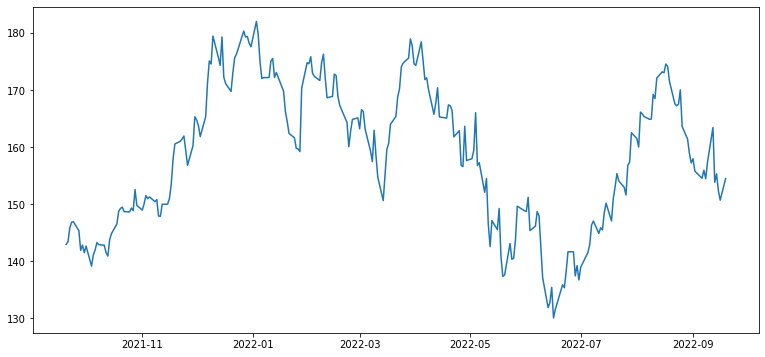

In [8]:
from matplotlib.pyplot import rcParams
rcParams['figure.figsize']=13,6

plt.plot(ts)

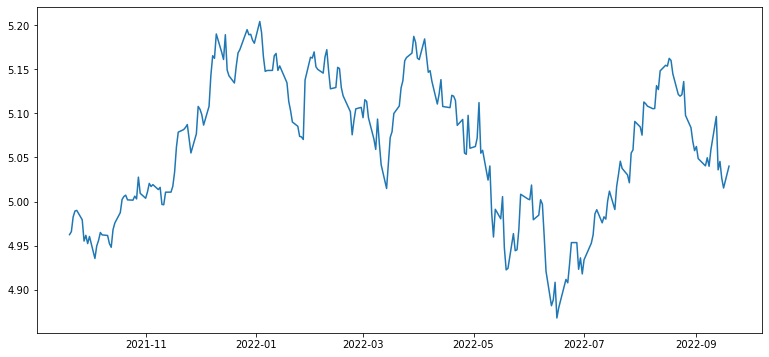

In [9]:
ts_log=np.log(ts)
plt.plot(ts_log)

# 시계열 안정성 분석

  * 정성적 그래프 분석
  * 정량적 Augmented Dicky-Fuller Test
  * 시계열 분해 Time Series Decomposition
  * Redisual 안정성 확인

In [10]:
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

In [11]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
  
  # statsmodels 패키지에서 제공하는 adfuller 메서드 호출
  dftest = adfuller(timeseries, autolag = 'AIC')

  # adfuller 메서드가 리턴한 결과를 정리하여 출력
  print('Results of Dickey-Fuller Test:')
  
  dfoutput = pd.Series(dftest[0:4], index = ['Tset Statistic', 'p-value', '#Lags Used','Number of Observations Used'])
  for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)' % key] = value
  
  print(dfoutput)

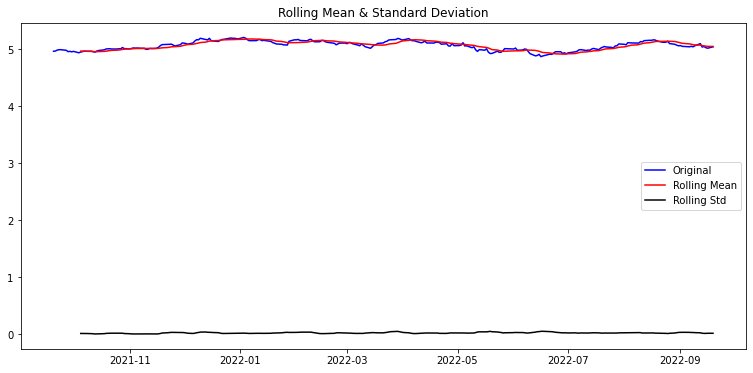

Results of Dickey-Fuller Test:
Tset Statistic                  -2.171407
p-value                          0.216786
#Lags Used                       0.000000
Number of Observations Used    251.000000
Critical Value (1%)             -3.456674
Critical Value (5%)             -2.873125
Critical Value (10%)            -2.572944
dtype: float64


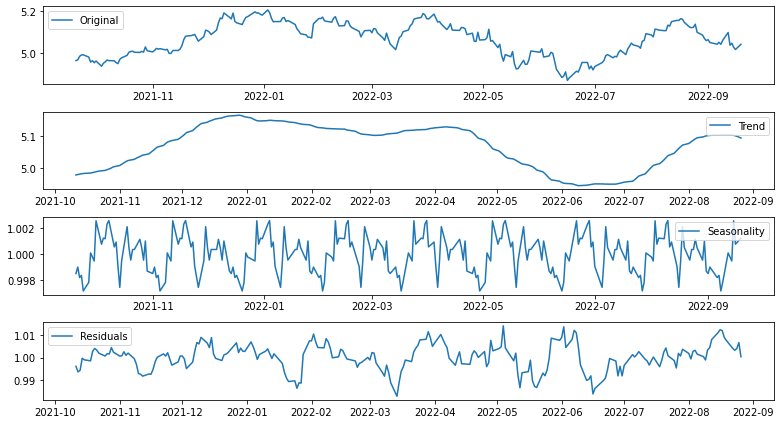

In [12]:
# 정성적 그래프 분석
plot_rolling_statistics(ts_log, window=12)

# 정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

# 시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model = 'multiplicative', period = 30)

trend = decomposition.trend            # 추세(시간 추이에 따르ㅏ 나타나는 평균값 변화)
seasonal = decomposition.seasonal      # 계절성(패턴이 파악되지 않은 주기적 변화)
residual = decomposition.resid         # 원본(로그변환한) - 추세 - 계절성

plt.rcParams["figure.figsize"]= (11,6)

plt.subplot(411)
plt.plot(ts_log, label= 'Original')
plt.legend(loc = 'best')

plt.subplot(412)
plt.plot(trend, label= 'Trend')
plt.legend(loc = 'best')

plt.subplot(413)
plt.plot(seasonal, label= 'Seasonality')
plt.legend(loc = 'best')

plt.subplot(414)
plt.plot(residual, label= 'Residuals')
plt.legend(loc = 'best')

plt.tight_layout()


In [13]:
# Residual 안정성 확인
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Tset Statistic                  -4.922544
p-value                          0.000032
#Lags Used                      11.000000
Number of Observations Used    210.000000
Critical Value (1%)             -3.461879
Critical Value (5%)             -2.875404
Critical Value (10%)            -2.574159
dtype: float64


In [35]:
seasonal[:60]

Date
2021-09-20    0.998512
2021-09-21    0.999001
2021-09-22    0.998205
2021-09-23    0.998369
2021-09-24    0.997177
2021-09-27    0.997832
2021-09-28    1.000085
2021-09-29    0.999770
2021-09-30    0.999468
2021-10-01    1.002537
2021-10-04    1.000750
2021-10-05    1.001213
2021-10-06    1.001168
2021-10-07    1.002274
2021-10-08    1.002559
2021-10-11    1.000542
2021-10-12    1.000915
2021-10-13    0.999057
2021-10-14    0.997452
2021-10-15    0.999475
2021-10-18    1.002088
2021-10-19    1.000493
2021-10-20    0.999538
2021-10-21    1.000346
2021-10-22    1.000347
2021-10-25    1.001124
2021-10-26    1.000478
2021-10-27    0.999534
2021-10-28    1.000995
2021-10-29    0.998697
2021-11-01    0.998512
2021-11-02    0.999001
2021-11-03    0.998205
2021-11-04    0.998369
2021-11-05    0.997177
2021-11-08    0.997832
2021-11-09    1.000085
2021-11-10    0.999770
2021-11-11    0.999468
2021-11-12    1.002537
2021-11-15    1.000750
2021-11-16    1.001213
2021-11-17    1.001168
2021-1

* 주기가 42일 인 것을 알 수 있다
  * 9월 24일 최저점: 0.997177
  * 11월 5일 최저점: 0.997177

# 학습, 테스트 데이터셋 생성

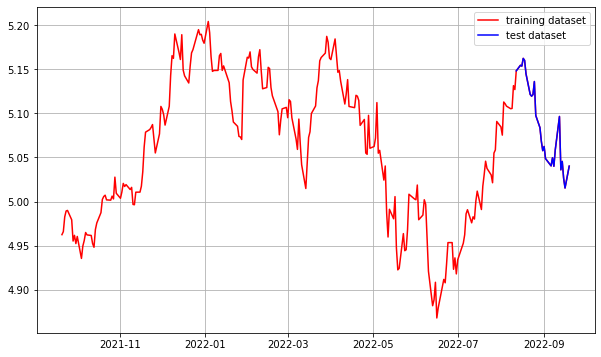

In [14]:
# 훈련 9 : 테스트 1
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]

plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data 를 적용하면 끊겨 보인다.
plt.plot(test_data, c='b', label='test dataset') 
plt.legend()

# 적정 ARIMA 모수 찾기

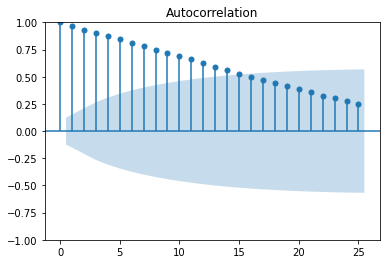

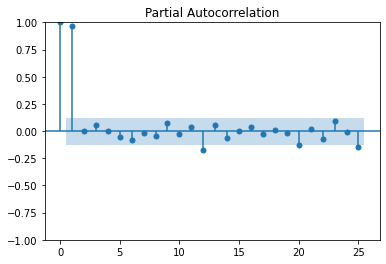

In [24]:
# ACF, PACF 그려보기 -> p,q 구하기
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)
plot_pacf(ts_log)
plt.show()

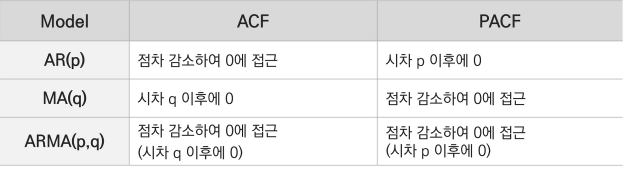

Results of Dickey-Fuller Test:
Tset Statistic                -1.601270e+01
p-value                        6.329971e-29
#Lags Used                     0.000000e+00
Number of Observations Used    2.500000e+02
Critical Value (1%)           -3.456781e+00
Critical Value (5%)           -2.873172e+00
Critical Value (10%)          -2.572969e+00
dtype: float64
Results of Dickey-Fuller Test:
Tset Statistic                -7.914125e+00
p-value                        3.877038e-12
#Lags Used                     1.100000e+01
Number of Observations Used    2.380000e+02
Critical Value (1%)           -3.458128e+00
Critical Value (5%)           -2.873762e+00
Critical Value (10%)          -2.573283e+00
dtype: float64


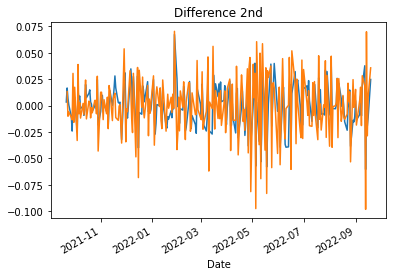

In [25]:
# 차분 안정성 확인 -> d 구하기
diff_1=ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title = 'Difference 1st')

augmented_dickey_fuller_test(diff_1)

# 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

# ARIMA 모델 훈련과 테스트


In [26]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

In [103]:
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.arima.model import ARIMA

# Build Model
model = ARIMA(train_data, order=(1,1,0))
fitted_m=model.fit()

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  226
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 563.701
Date:                Tue, 07 Mar 2023   AIC                          -1123.401
Time:                        15:52:17   BIC                          -1116.569
Sample:                             0   HQIC                         -1120.644
                                - 226                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0004      0.063      0.006      0.995      -0.123       0.124
sigma2         0.0004   3.48e-05     11.219      0.000       0.000       0.000
Ljung-Box (L1) (Q):                   0.00   Jarque-

In [104]:
model = ARIMA(train_data, order=(1,2,0))
fitted_m=model.fit()

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  226
Model:                 ARIMA(1, 2, 0)   Log Likelihood                 510.842
Date:                Tue, 07 Mar 2023   AIC                          -1017.684
Time:                        15:52:17   BIC                          -1010.861
Sample:                             0   HQIC                         -1014.930
                                - 226                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4701      0.058     -8.052      0.000      -0.585      -0.356
sigma2         0.0006    5.3e-05     11.531      0.000       0.001       0.001
Ljung-Box (L1) (Q):                   6.10   Jarque-

In [105]:
model = ARIMA(train_data, order=(1,0,0))
fitted_m=model.fit()

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  226
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 566.407
Date:                Tue, 07 Mar 2023   AIC                          -1126.814
Time:                        15:52:18   BIC                          -1116.552
Sample:                             0   HQIC                         -1122.672
                                - 226                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0592      0.036    139.350      0.000       4.988       5.130
ar.L1          0.9694      0.017     55.821      0.000       0.935       1.003
sigma2         0.0004   3.31e-05     11.639      0.0

* 차분에 따라 다음과 같은 통계량을 확인한다.
  * 1차분
    * Likelihood : 563.701 
    * AIC : -1126.814 / BIC : -1116.552 
    * AR 모델 1 lag 의 p-value: 0.995 --> 유의미한 값을 가지지 못 함
    * Ljung-Box (L1) : p-value 값이 0.98로 잔차가 자기 상관되지 않는다. (귀무가설 기각하지 못 함)
    * Heteroskedasticity: p-value 값이 0.00 으로 잔차의 분산이 일정하지 않다(귀무가설을 기각 한다.)
    * Jarque-Bera: p-value 값이 0.28로 normal distribution 을 따른다.(귀무가설을 기각하지 못 함)
  * 2차분
    * Likelihood : 510.842 
    * AIC : -1017.684 / BIC : -1010.861
    * AR 모델 1 lag 의 p-value: 0.0 --> 유의미한 값을 가진다.
    * Ljung-Box (L1) : p-value 값이 0.01로 잔차가 자기 상관되고 있다.(귀무가설 기각)
    * Heteroskedasticity: p-value 값이 0.00 으로 잔차의 분산이 일정하지 않다(귀무가설을 기각 한다.)
    * Jarque-Bera: p-value 값이 0.47로 normal distribution 을 따른다.(귀무가설을 기각 하지 못함)
  * 0차분
    * Likelihood : 566.407
    * AIC : -1126.814 / BIC : -1116.552
    * AR 모델 1 lag 의 p-value: 0.0 --> 유의미한 값을 가진다.
    * Ljung-Box (L1) : p-value 값이 0.84로 잔차가 자기 상관되지 않는다.(귀무가설 기각하지 못 함)
    * Heteroskedasticity: p-value 값이 0.00 으로 잔차의 분산이 일정하지 않다(귀무가설을 기각 한다.)
    * Jarque-Bera: p-value 값이 0.12로 normal distribution 을 따른다.(귀무가설을 기각하지 못함)

=> 위의 통계량을 비교하였을 때 0차분 했을 때가 가장 시계열에 적합함을 알 수 있다.

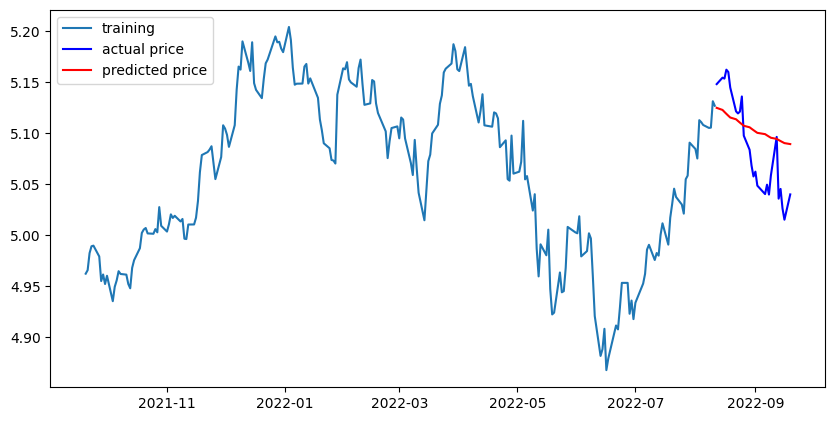

In [71]:
# Forecast : 결과가 fc에 담긴다.


model=ARIMA(train_data, order=(1,0,0))
fitted_m = model.fit()

fc=fitted_m.forecast(len(test_data),alpha=0.05)
fc=np.array(fc)

fc_series = pd.Series(fc, index = test_data.index)

plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [72]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data),np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data),np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc)-np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  44.26925318892802
MAE:  5.960662561215272
RMSE:  6.653514348742927
MAPE: 3.73%


#SARIMA

In [37]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 17.9 MB/s eta 0:00:00


In [90]:
# m = 7 : 일별(daily), m = 52 : 주별(weekly), m = 12 : 월별(monthly) / default : m = 1 (비계절성)

import pmdarima as pm 

model_auto_arima = pm.auto_arima(train_data, seasonal=True, m=52, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[52] intercept   : AIC=-1113.626, Time=23.25 sec
 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=-1123.709, Time=0.13 sec
 ARIMA(1,1,0)(1,0,0)[52] intercept   : AIC=-1119.709, Time=1.87 sec
 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=-1119.709, Time=3.94 sec
 ARIMA(0,1,0)(0,0,0)[52]             : AIC=-1125.401, Time=0.04 sec
 ARIMA(0,1,0)(1,0,0)[52] intercept   : AIC=-1121.709, Time=3.31 sec
 ARIMA(0,1,0)(0,0,1)[52] intercept   : AIC=-1121.709, Time=6.30 sec
 ARIMA(0,1,0)(1,0,1)[52] intercept   : AIC=-1119.716, Time=5.56 sec
 ARIMA(1,1,0)(0,0,0)[52] intercept   : AIC=-1121.709, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[52] intercept   : AIC=-1121.708, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[52] intercept   : AIC=-1119.808, Time=0.39 sec

Best model:  ARIMA(0,1,0)(0,0,0)[52]          
Total fit time: 45.062 seconds


In [91]:
# m = 7 : 일별(daily), m = 52 : 주별(weekly), m = 12 : 월별(monthly) / default : m = 1 (비계절성)

import pmdarima as pm 

model_auto_arima = pm.auto_arima(train_data, seasonal=True, m=7, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=-1112.830, Time=2.27 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=-1123.709, Time=0.15 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=-1119.895, Time=0.81 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=-1119.900, Time=1.02 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=-1125.401, Time=0.17 sec
 ARIMA(0,1,0)(1,0,0)[7] intercept   : AIC=-1121.897, Time=0.30 sec
 ARIMA(0,1,0)(0,0,1)[7] intercept   : AIC=-1121.896, Time=1.18 sec
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=-1119.900, Time=0.87 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=-1121.709, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=-1121.708, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=-1119.808, Time=0.31 sec

Best model:  ARIMA(0,1,0)(0,0,0)[7]          
Total fit time: 7.337 seconds


In [92]:
# m = 7 : 일별(daily), m = 52 : 주별(weekly), m = 12 : 월별(monthly) / default : m = 1 (비계절성)

import pmdarima as pm 

model_auto_arima = pm.auto_arima(train_data, seasonal=True, m=42, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[42] intercept   : AIC=-1113.636, Time=18.56 sec
 ARIMA(0,1,0)(0,0,0)[42] intercept   : AIC=-1123.709, Time=0.12 sec
 ARIMA(1,1,0)(1,0,0)[42] intercept   : AIC=-1119.723, Time=1.59 sec
 ARIMA(0,1,1)(0,0,1)[42] intercept   : AIC=-1119.724, Time=4.15 sec
 ARIMA(0,1,0)(0,0,0)[42]             : AIC=-1125.401, Time=0.22 sec
 ARIMA(0,1,0)(1,0,0)[42] intercept   : AIC=-1121.723, Time=2.98 sec
 ARIMA(0,1,0)(0,0,1)[42] intercept   : AIC=-1121.725, Time=2.61 sec
 ARIMA(0,1,0)(1,0,1)[42] intercept   : AIC=-1119.716, Time=1.43 sec
 ARIMA(1,1,0)(0,0,0)[42] intercept   : AIC=-1121.709, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[42] intercept   : AIC=-1121.708, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[42] intercept   : AIC=-1119.808, Time=0.17 sec

Best model:  ARIMA(0,1,0)(0,0,0)[42]          
Total fit time: 32.035 seconds


In [ ]:
# m = 7 : 일별(daily), m = 52 : 주별(weekly), m = 12 : 월별(monthly) / default : m = 1 (비계절성)

import pmdarima as pm 

model_auto_arima = pm.auto_arima(train_data, seasonal=False, m=1, trace=True)

In [87]:
print(model_auto_arima)
print(model_auto_arima.params())
print(model_auto_arima.aic())

 ARIMA(0,1,0)(0,0,0)[52]          
sigma2    0.00039
dtype: float64
-1125.4009909497192


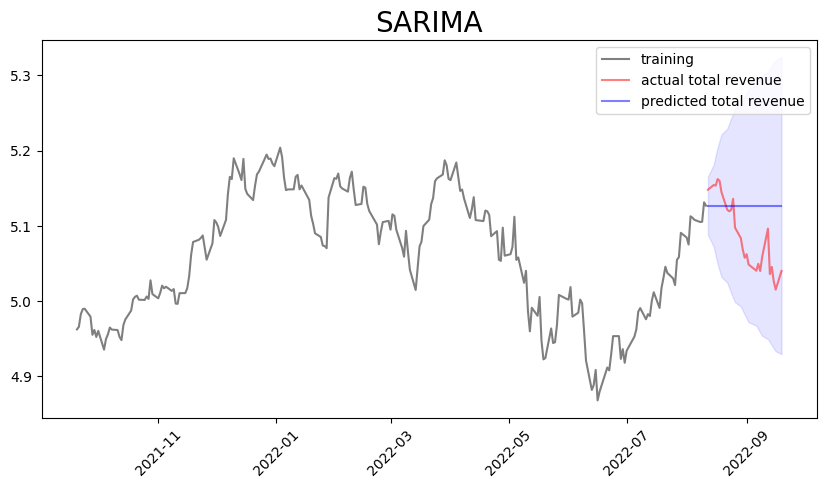

In [88]:
y_pred, conf_int = model_auto_arima.predict(n_periods=test_data.shape[0], return_conf_int=True)

plt.figure(figsize=(10,5), dpi=100)

plt.plot(train_data, alpha=0.5, color='black', label='training')
plt.plot(test_data, alpha=0.5, color='red', label = 'actual total revenue')
plt.plot(test_data.index.values, y_pred, alpha=0.5, color='blue', label = 'predicted total revenue')

# Confidence Interval
plt.fill_between(test_data.index.values, conf_int[:,0], conf_int[:,1], alpha=0.1, color='b')

plt.title('SARIMA', fontsize=20)
plt.xticks(rotation=45)

plt.legend()
plt.show()

In [89]:
mse = mean_squared_error(np.exp(test_data), np.exp(y_pred))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data),np.exp(y_pred))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data),np.exp(y_pred)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(y_pred)-np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  98.57920524773634
MAE:  8.491156615384593
RMSE:  9.928706121531462
MAPE: nan%


In [97]:
# m = 7 : 일별(daily), m = 52 : 주별(weekly), m = 12 : 월별(monthly) / default : m = 1 (비계절성)
# D 는 계절성을 고려한 차분

import pmdarima as pm 

model_auto_arima = pm.auto_arima(train_data, seasonal=True, m=7, D=1,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[7] intercept   : AIC=-1051.207, Time=9.17 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=-673.486, Time=0.11 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=-1008.069, Time=1.29 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=-846.532, Time=1.25 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=-673.854, Time=0.08 sec
 ARIMA(2,0,2)(0,1,1)[7] intercept   : AIC=inf, Time=2.68 sec
 ARIMA(2,0,2)(1,1,0)[7] intercept   : AIC=-1004.328, Time=2.81 sec
 ARIMA(2,0,2)(2,1,1)[7] intercept   : AIC=-1034.995, Time=5.85 sec
 ARIMA(2,0,2)(1,1,2)[7] intercept   : AIC=inf, Time=4.53 sec
 ARIMA(2,0,2)(0,1,0)[7] intercept   : AIC=-960.263, Time=0.82 sec
 ARIMA(2,0,2)(0,1,2)[7] intercept   : AIC=inf, Time=4.35 sec
 ARIMA(2,0,2)(2,1,0)[7] intercept   : AIC=-1024.357, Time=5.56 sec
 ARIMA(2,0,2)(2,1,2)[7] intercept   : AIC=-1051.196, Time=3.94 sec
 ARIMA(1,0,2)(1,1,1)[7] intercept   : AIC=inf, Time=2.07 sec
 ARIMA(2,0,1)(1,1,1)[7] intercept   : AIC=inf, 

In [98]:
print(model_auto_arima)
print(model_auto_arima.params())
print(model_auto_arima.aic())

 ARIMA(2,0,2)(1,1,1)[7] intercept
intercept    0.000004
ar.L1        0.019235
ar.L2        0.980392
ma.L1        1.012782
ma.L2        0.032717
ar.S.L7      0.049933
ma.S.L7     -0.924957
sigma2       0.000413
dtype: float64
-1051.207279138459


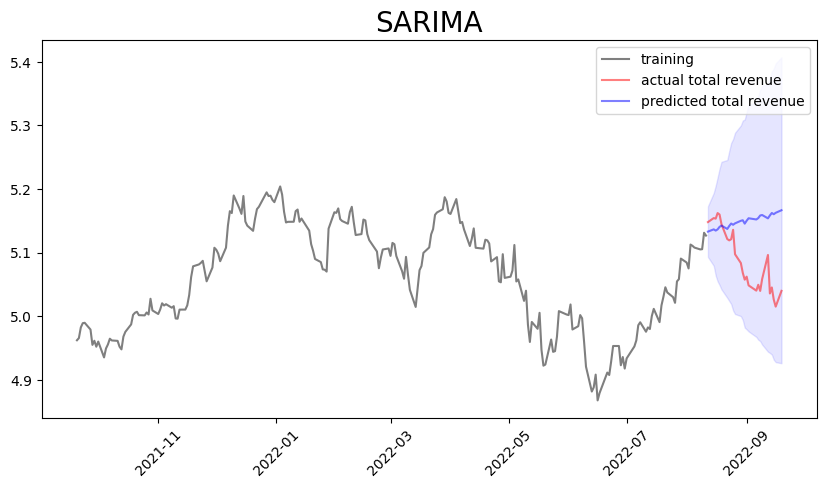

In [99]:
y_pred, conf_int = model_auto_arima.predict(n_periods=test_data.shape[0], return_conf_int=True)

plt.figure(figsize=(10,5), dpi=100)

plt.plot(train_data, alpha=0.5, color='black', label='training')
plt.plot(test_data, alpha=0.5, color='red', label = 'actual total revenue')
plt.plot(test_data.index.values, y_pred, alpha=0.5, color='blue', label = 'predicted total revenue')

# Confidence Interval
plt.fill_between(test_data.index.values, conf_int[:,0], conf_int[:,1], alpha=0.1, color='b')

plt.title('SARIMA', fontsize=20)
plt.xticks(rotation=45)

plt.legend()
plt.show()

In [100]:
mse = mean_squared_error(np.exp(test_data), np.exp(y_pred))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data),np.exp(y_pred))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data),np.exp(y_pred)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(y_pred)-np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  185.89208193342844
MAE:  11.362416774123801
RMSE:  13.634224654648627
MAPE: nan%


# 결론
  * Auto_arima 를 통해 모수를 구하여 시계열 모델을 학습 및 예측을 진행했을 때, 모두 예측 값이 일정한 값으로 나왔다.
  * Auto_arima 에서는 차분을 1번 하고 AR 모델과 MA 모델은 모두 적용하지 않는다. 이 때, 차분값에 따라 1차분은 예측값이 일정한 값으로 수렴하고, 2차분을 했을때는 예측 값이 우상향하는 모습을 보인다.
  * ARIMA 모델에서는 auto_arima 가 아닌 실제 acf 및 pacf 함수 그래프를 시각화하여 모수를 탐색했다.
    * acf 는 점점 작아져서 0으로 수렴 q = 0
    * pacf 는 1 lag 값 이후 0에 근접 p = 1
  * 또한 차분에서는 1차분 및 2차분까지 시도하여 그래프로 시각화 및 통계량을 확인하였고, 실제 모델에 차분값을 적용했을 때는 0차분을 했을 때가 오차값이 가장 낮게 나왔음을 확인할 수 있다.
  * STL 분해를 통해서는 42일 주기의 계절성이 의심되지만 auto_arima 를 활용하여 계절성을 확인해봤을 때는 (m = 7 / m = 42 / m = 52 등) 실제 모델의 예측 그래프와 오차값에 변화를 주지 못 했다.
  * 따라서, 결과적으로 모수를 찾는 방법에는 다양한 방법이 있으나, 무조건 적인 최적의 방법은 없음을 확인 했다.